In [40]:
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.simplefilter(action='ignore', category=UndefinedMetricWarning)

import numpy as np
from sklearn.metrics import confusion_matrix

from process_data import process_data
from evaluate import evaluate_pred, print_dummy_evaluations
from visualization import plot_confusion_matrix
from utils.constants import SEED

In [41]:
X_train, X_valid, X_test, Y_train, Y_valid, Y_test = process_data()

Dropped columns: ['snow']
New columns: []
Split: "train" 	[Size: 1120] 	[Prec: 0.7]
	X: (1120, 14)
	Y: (1120,)
Split: "valid" 	[Size: 239] 	[Prec: 0.149375]
	X: (239, 14)
	Y: (239,)
Split: "test" 	[Size: 241] 	[Prec: 0.150625]
	X: (241, 14)
	Y: (241,)


# Random Forest
Parts:
1. Train the model
2. Tune the model
3. Evaluate the model

In [42]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier(max_depth=7, random_state=SEED)

### Training

In [43]:
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, random_state=1)

### Tuning

### Evaluating

In [44]:
y_pred = model.predict(X_test)
y_true = Y_test

metrics = evaluate_pred(y_pred, y_true)

print('-- Random Forest model --\n')
for metric, value in metrics.items():
    print(f'{metric.capitalize()}: \t{value}')

print('\n-- Dummy models -- ')
print_dummy_evaluations(X_train, Y_train, X_test, Y_test)

-- Random Forest model --

Accuracy: 	0.8962655601659751
Recall: 	0.4722222222222222
Precision: 	0.7391304347826086

-- Dummy models -- 

Most_frequent
  Accuracy: 	0.8506224066390041
  Recall: 	0.0
  Precision: 	0.0

Stratified
  Accuracy: 	0.7053941908713693
  Recall: 	0.16666666666666666
  Precision: 	0.1276595744680851

Uniform
  Accuracy: 	0.4315352697095436
  Recall: 	0.3333333333333333
  Precision: 	0.096


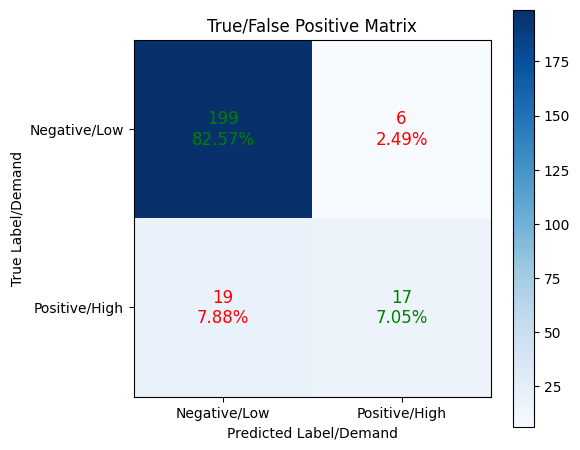

True Positive (TP): 17
True Negative (TN): 199
False Positive (FP): 6
False Negative (FN): 19


In [46]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
confusion_matrix_data = np.array([[tn, fp], [fn, tp]])
plot_confusion_matrix(confusion_matrix_data)

print(f'True Positive (TP): {tp}')
print(f'True Negative (TN): {tn}')
print(f'False Positive (FP): {fp}')
print(f'False Negative (FN): {fn}')